# Importing Libraries

In [28]:
#Importing necessary libraries
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BhuwanDhakal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BhuwanDhakal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BhuwanDhakal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Load File

In [29]:
 # import txt file

keyfile = open('Key events of 20th century.txt', encoding='utf-8')

with open('Key events of 20th century.txt', 'r', errors='ignore') as file: 
    data = file.read().replace( '\n', ' ')

## Tokenization

In [30]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['Jump to content Main menu Search Create account Log in Personal tools Toggle the table of contents Key events of the 20th century 2 languages Article Talk Read Edit View history Tools From Wikipedia, the free encyclopedia The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.", 'Events in the 20th century[edit] The world at the beginning of the century[edit] Main article: Edwardian era The new beginning of the 20th century marked significant changes.', 'The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', 'From 1914 to 1918, the First World War, and its aftermath, caused major changes in the powe

In [31]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Jump', 'to', 'content', 'Main', 'menu', 'Search', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Toggle', 'the', 'table', 'of', 'contents', 'Key', 'events', 'of', 'the', '20th', 'century', '2', 'languages', 'Article', 'Talk', 'Read', 'Edit', 'View', 'history', 'Tools', 'From', 'Wikipedia', ',', 'the', 'free', 'encyclopedia', 'The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today', '.', 'Events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'Th

In [32]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4750 samples and 20868 outcomes>


In [33]:
top10_dist_words = dist_words.most_common(10)

In [34]:
all_fdist = pd.Series(dict(top10_dist_words))

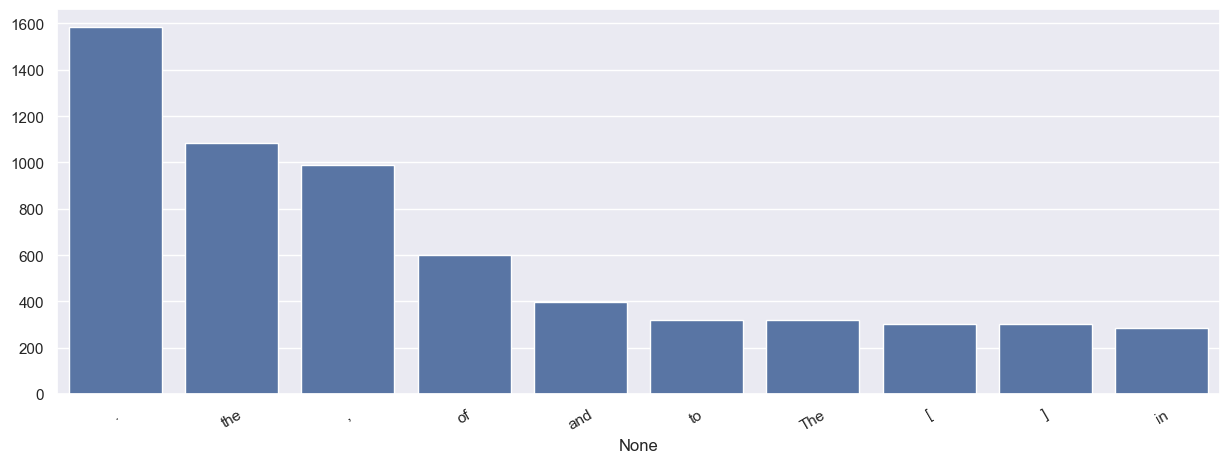

In [35]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,5))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

## Stopwords

In [36]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'have', 'ma', 'be', 'her', "mightn't", "didn't", 'on', 'theirs', 'any', 'mightn', 'were', 'here', 'while', 'under', 'wasn', 'where', 'don', 'hers', "shan't", 'shouldn', 'those', 'so', 'which', 'they', 'out', 'has', 'off', 'myself', 'its', "you've", 'into', 're', 'down', 'each', 'these', 'below', 'o', "won't", 'we', 'no', 'with', 'm', 'herself', 'couldn', 'do', 'too', 'him', 'above', 'doesn', 'from', 'nor', 'there', 'because', "hasn't", 'haven', "you're", 'themselves', 'can', "don't", 'just', 'now', 'as', "should've", 'whom', 'she', 'his', 'then', 'didn', 'again', 'how', "shouldn't", 'should', "weren't", 'does', 'when', 'being', 'at', 'your', "haven't", 'such', 'hasn', 'our', 'all', 'doing', 'them', 'had', "mustn't", 'was', 'yourself', 'only', 'than', 'weren', 'yourselves', 'that', "that'll", 'once', 've', "aren't", 'yours', 'a', "you'd", 'but', 's', 'shan', 'it', 'this', 'during', 'me', 'the', "needn't", "wouldn't", 'by', 'between', 'some', 'will', 'against', "doesn't", 'been', 'or', 

In [37]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [38]:
filtered_words

['Jump',
 'content',
 'Main',
 'menu',
 'Search',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Toggle',
 'table',
 'contents',
 'Key',
 'events',
 '20th',
 'century',
 '2',
 'languages',
 'Article',
 'Talk',
 'Read',
 'Edit',
 'View',
 'history',
 'Tools',
 'From',
 'Wikipedia',
 ',',
 'free',
 'encyclopedia',
 'The',
 '20th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 '.',
 'The',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 ',',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space-based',
 'rockets',
 ',',
 'World',
 'Wide',
 'Web',
 'created',
 '.',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 "'",
 'lives',
 'shaped',
 '21st',
 'century',
 'today',
 '.',
 'Events',
 '20th',
 'century',
 '[',
 'edit',
 ']',
 'The',
 'world',
 'beginning',
 'century',
 '[',
 'edit',
 ']',
 'Main',
 'article',
 ':',
 'Edwardian',
 'era',
 'The',
 'new',
 'beginning',
 '20th'

In [39]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4647 samples and 16250 outcomes>


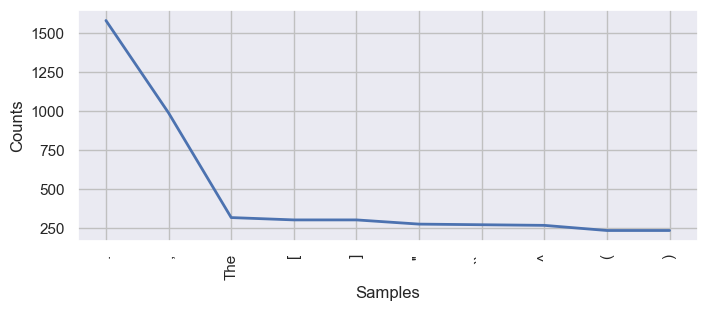

In [40]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [41]:
dist_words_filter

FreqDist({'.': 1583, ',': 990, 'The': 318, '[': 303, ']': 303, "''": 276, '``': 272, '^': 268, '(': 235, ')': 235, ...})

In [42]:
# Substitute all punctuation marks with a space

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(filtered_words))

In [43]:
sans_punc

'  Jump    content    Main    menu    Search    Create    account    Log    Personal    tools    Toggle    table    contents    Key    events      th    century         languages    Article    Talk    Read    Edit    View    history    Tools    From    Wikipedia         free    encyclopedia    The      th    century    changed    world    unprecedented    ways         The    World    Wars    sparked    tension    countries    led    creation    atomic    bombs         Cold    War    led    Space    Race    creation    space based    rockets         World    Wide    Web    created         These    advancements    played    significant    role    citizens         lives    shaped      st    century    today         Events      th    century         edit         The    world    beginning    century         edit         Main    article         Edwardian    era    The    new    beginning      th    century    marked    significant    changes         The        s    saw    decade    herald   

In [44]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Jump', 'content', 'Main', 'menu', 'Search', 'Create', 'account', 'Log', 'Personal', 'tools', 'Toggle', 'table', 'contents', 'Key', 'events', 'th', 'century', 'languages', 'Article', 'Talk', 'Read', 'Edit', 'View', 'history', 'Tools', 'From', 'Wikipedia', 'free', 'encyclopedia', 'The', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Events', 'th', 'century', 'edit', 'The', 'world', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'The', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'The', 's', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcast

In [45]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2) 

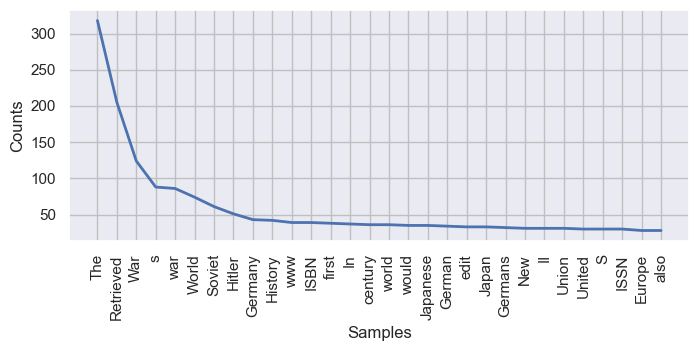

In [46]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [47]:
dist_words_filter_2.most_common(20)

[('The', 318),
 ('Retrieved', 205),
 ('War', 124),
 ('s', 88),
 ('war', 86),
 ('World', 74),
 ('Soviet', 61),
 ('Hitler', 51),
 ('Germany', 43),
 ('History', 42),
 ('www', 39),
 ('ISBN', 39),
 ('first', 38),
 ('In', 37),
 ('century', 36),
 ('world', 36),
 ('would', 35),
 ('Japanese', 35),
 ('German', 34),
 ('edit', 33)]

#### The most common stop words have been removed. There are still some of them remaining like 's', 'In', 'would' etc. which needs to be removed.

## POS Tags with TextBlob

In [48]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The', 'In', 'would', 'S', 'II', 'would', 'p']

In [49]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [50]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 15.6 ms
Wall time: 4.29 ms


In [51]:
text

TextBlob("['Jump', 'content', 'Main', 'menu', 'Search', 'Create', 'account', 'Log', 'Personal', 'tools', 'Toggle', 'table', 'contents', 'Key', 'events', 'th', 'century', 'languages', 'Article', 'Talk', 'Read', 'Edit', 'View', 'history', 'Tools', 'From', 'Wikipedia', 'free', 'encyclopedia', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Events', 'th', 'century', 'edit', 'world', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'From', 'First', 'World'

In [52]:
tags_list = text.tags

In [53]:
tags_list

[('[', 'JJ'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Personal", 'NNP'),
 ("'", 'POS'),
 ("'tools", 'NNS'),
 ("'", 'POS'),
 ("'Toggle", 'NNP'),
 ("'", 'POS'),
 ("'table", 'JJ'),
 ("'contents", 'NNS'),
 ("'", 'POS'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'languages", 'NNS'),
 ("'", 'POS'),
 ("'Article", 'NNP'),
 ("'", 'POS'),
 ("'Edit", 'NNP'),
 ("'", 'POS'),
 ("'View", 'NNP'),
 ("'", 'POS'),
 ("'history", 'NNP'),
 ("'", 'POS'),
 ("'Tools", 'NNS'),
 ("'", 'POS'),
 ("'From", 'IN'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'encyclopedia", 'NNP'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'changed", 'VBD'),
 ("'world", 'NNP'),
 ("'", 'P

In [54]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [55]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Jump,NNP
2,',POS
3,'content,NNP
4,',POS


In [56]:
df_t = df_text.groupby('Word type').count().reset_index()

In [57]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,74
2,DT,14
3,EX,12
4,FW,42


In [58]:
top10 = df_t.nlargest(10, 'Words')

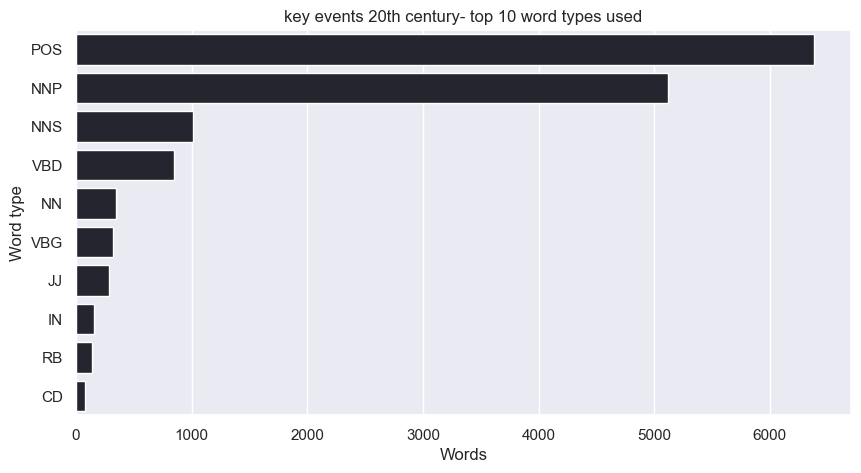

In [59]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("key events 20th century- top 10 word types used")

## Bar plot with top 15 POS labels

### Noun

In [60]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15 = y.nlargest(15, 'Occurrences')

In [61]:
top15

,Word,Occurrences
99,'Germans,32
234,'Union,31
695,'weapons,24
6,'Allies,19
421,'forces,18
120,'Jews,17
351,'countries,17
519,'nations,14
681,'troops,12
360,'days,11


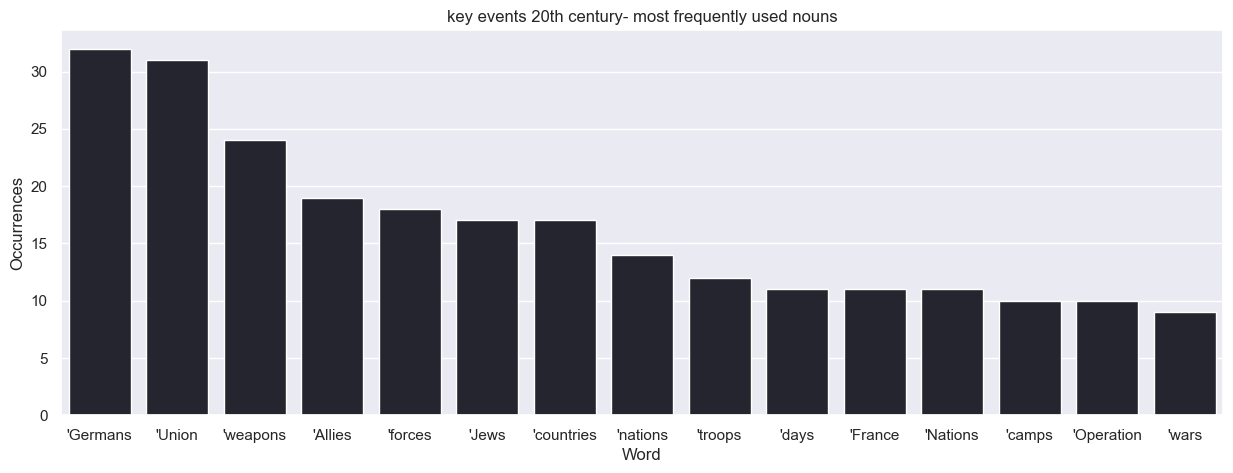

In [62]:
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 15):
      sns.barplot(x="Word", y="Occurrences",
      saturation=0.9, data = top15).set_title("key events 20th century- most frequently used nouns")

### Germans are the most used Nouns followed by Union and Weapons. This might be because of the world war. Most of the nouns are related to world wars.

### Verb

In [175]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [176]:
top15

,Word,Occurences
26,'Retrieved,205
35,'United,30
0,'Allied,18
194,'led,15
312,'used,13
192,'launched,12
1,'Archived,10
92,'controlled,9
160,'forced,8
304,'turned,7


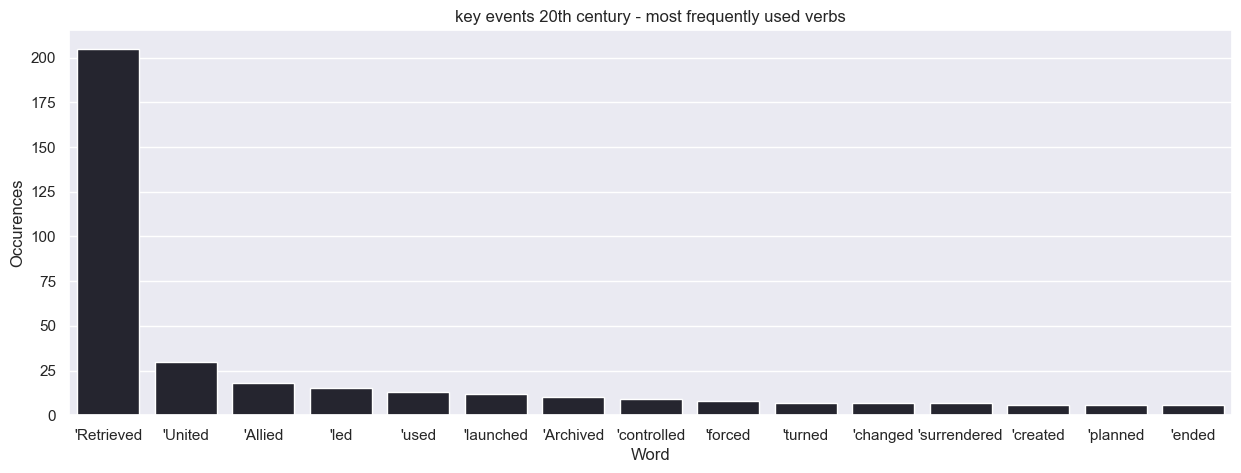

In [177]:
plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("key events 20th century - most frequently used verbs")

#### Retreived is the most frequently used verb. It is used more than 8 times compared to second most popular verb 'united' 

## Adjectives

In [178]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [179]:
top15

,Word,Occurences
28,'Japanese,35
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
1,'African,6
102,'political,6
42,'Russian,5
103,'possible,5
7,'Baltic,5


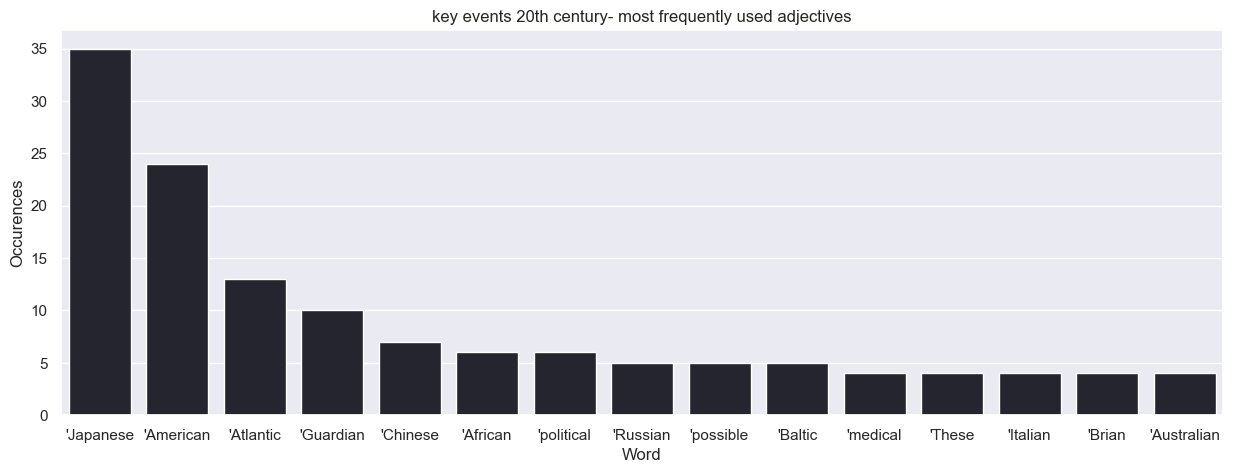

In [180]:
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("key events 20th century- most frequently used adjectives")

#### Most of the adjectives used are the country related.

## Countries and number of times they mentioned in the text

In [181]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Jump content Main menu Search Create account Log Personal tools Toggle table contents Key events th century languages Article Talk Read Edit View history Tools From Wikipedia free encyclopedia th century changed world unprecedented ways World Wars sparked tension countries led creation atomic bombs Cold War led Space Race creation space based rockets World Wide Web created These advancements played significant role citizens lives shaped st century today Events th century edit world beginning century edit Main article Edwardian era new beginning th century marked significant changes saw decade herald series inventions including automobile airplane radio broadcasting From First World War aftermath caused major changes power balance world destroying transforming powerful empires war end wars World War I edit Main article World War I Arrest suspect Sarajevo following Assassination Archduke Franz Ferdinand First World War simply WWI termed Great War contemporaries started ended war extensio

In [182]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [183]:
all_counts

Counter({'Retrieved': 205,
         'War': 124,
         'war': 86,
         'World': 74,
         'Soviet': 61,
         'Hitler': 51,
         'Germany': 43,
         'History': 42,
         'www': 39,
         'ISBN': 39,
         'first': 38,
         'century': 36,
         'world': 36,
         'Japanese': 35,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'United': 30,
         'ISSN': 30,
         'Europe': 28,
         'also': 28,
         'th': 27,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'This': 24,
         'American': 24,
         'weapons': 24,
         'history': 23,
         'attack': 23,
         'new': 22,
         'Stalin': 21,
         'Holocaust': 21,
         'Africa': 21,
         'Main': 20,
         'end': 20,
         'British': 20,
         'Nazi': 20,

In [184]:
country = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [185]:
country.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [186]:
country['country_name_alias'] = country['country_name'].apply(lambda x: x.strip())

In [187]:
country

,country_name,country_name_alias
1,Afghanistan,Afghanistan
2,Albania,Albania
3,Algeria,Algeria
4,Andorra,Andorra
5,Angola,Angola
...,...,...
205,Sahrawi Arab Democratic Republic,Sahrawi Arab Democratic Republic
206,Somaliland,Somaliland
207,South Ossetia,South Ossetia
208,Taiwan,Taiwan


In [188]:
country_list = country['country_name_alias'].to_list()

In [189]:
dict_of_counts = {d : all_counts[d] for d in country_list}

In [190]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [191]:
#Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}
df = pd.DataFrame(dct)

In [192]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [193]:
df = df.transpose().reset_index()

In [194]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [195]:
df.rename(columns = {"index":"Country_name", 0:"Times mentioned"}, inplace = True)

In [196]:
df1 = df[df['Times mentioned'] > 0] 

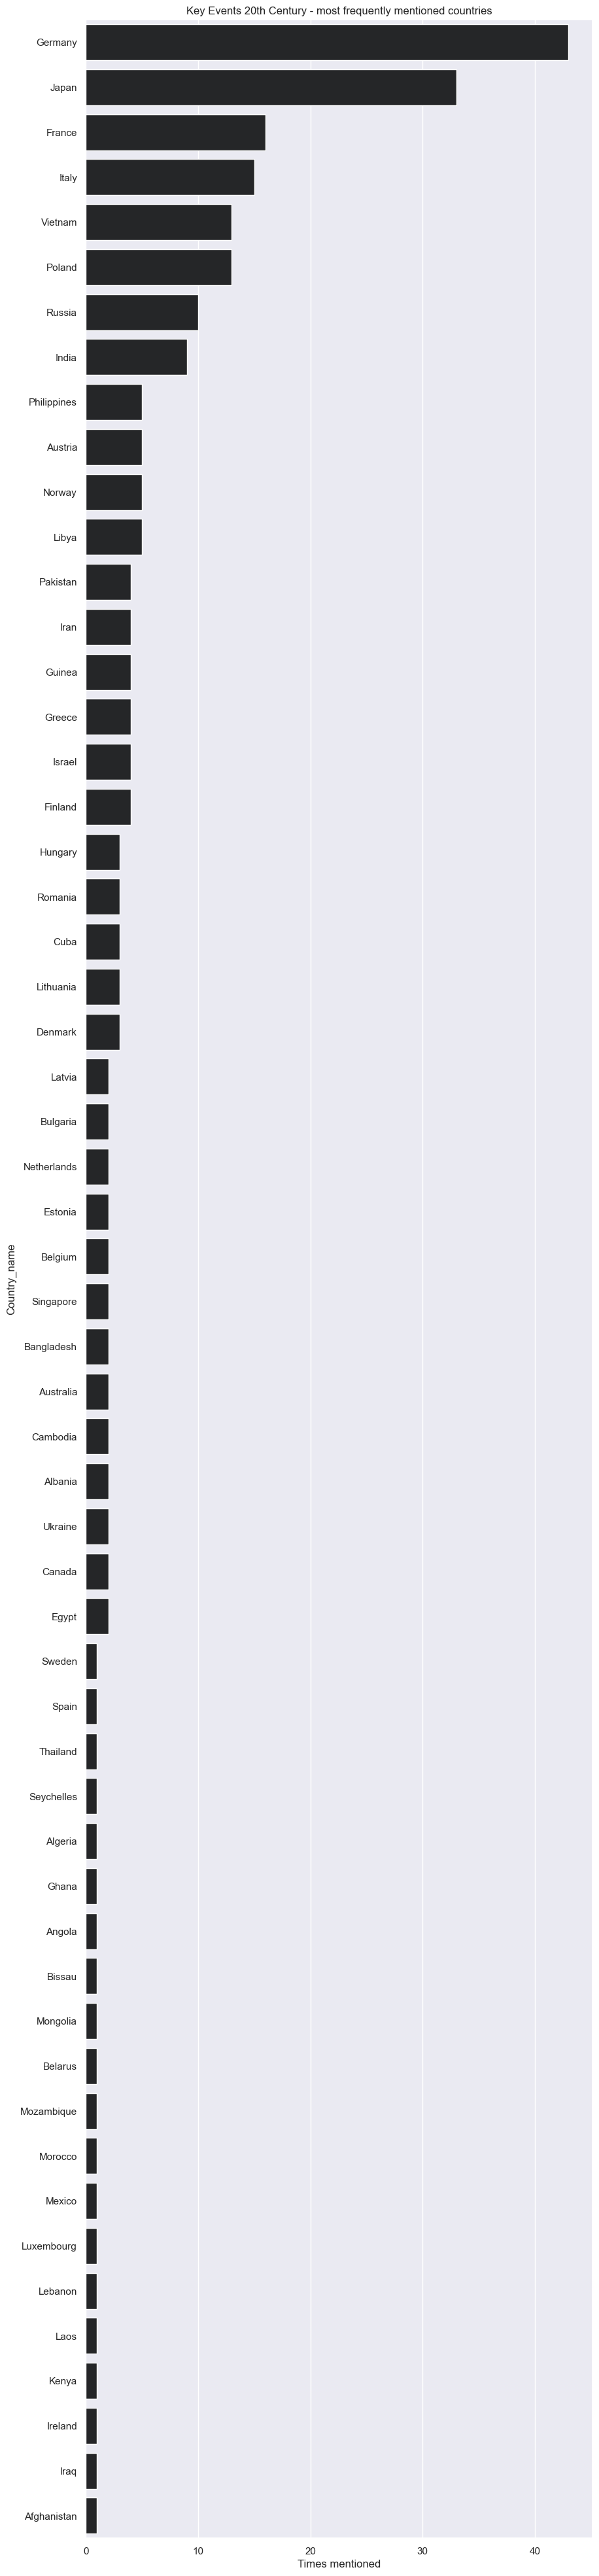

In [197]:
plt.figure(figsize=(10, 50))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Country_name", 
    saturation=0.9, data = df1.sort_values("Times mentioned", ascending = False)).set_title("Key Events 20th Century - most frequently mentioned countries")

#### Germany, Japan and France are the top three countries most commonly mentioned. This is because of the world war